## Indian Air Quality Analysis

The dataset consists primarily 5 different types pollutants measured over the years in different states and cities of India.The pollutants are so2,no2,rspm,spm and pm2_5.Where SO2 and NO2 are harmful gaseous emmissions; rspm, spm and pm2_5 come under susended air pollutants.





In [31]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
df = pd.read_csv('../input/india-air-quality-data/data.csv',encoding = 'unicode_escape')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [33]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

Now, we can immediatly see that there are quite a few nulls in various columns, which need work and first need a closer inspection.

In [35]:
# Select a project name
project='indian-air quality analysis'

In [36]:
# Install the Jovian library
!pip install jovian --upgrade --quiet

In [37]:
import jovian

In [38]:
jovian.commit(project=project)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/harshadadesai007/indian-air quality analysis


<IPython.core.display.Javascript object>

`jovian.commit` uploads the notebook to your [Jovian.ml](https://jovian.ml) account, captures the Python environment and creates a shareable link for your notebook as shown above. You can use this link to share your work and let anyone (including you) run your notebooks and reproduce your work.

## Data Preparation & Cleaning

Clearly there are lots of null values, noticeably in stn_code,agency, both of which should therefore be not included further in the analysis.

    Intuitively, these two columns will hardly add much value to analysis.

    Now, focusing on the categorical variables, we are left with location_monitoring_station which consists of considerable nulls (approximately 27000).

    Out of the two dates columns, immediate attention goes to sampling date which has different formats within, highlighting some data input issues.

In [39]:
df.drop(['stn_code','agency','sampling_date','location_monitoring_station'],axis=1,inplace=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   state     435742 non-null  object 
 1   location  435739 non-null  object 
 2   type      430349 non-null  object 
 3   so2       401096 non-null  float64
 4   no2       419509 non-null  float64
 5   rspm      395520 non-null  float64
 6   spm       198355 non-null  float64
 7   pm2_5     9314 non-null    float64
 8   date      435735 non-null  object 
dtypes: float64(5), object(4)
memory usage: 29.9+ MB


,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,1990-03-01


Fixing the missing values firstly for all the pollutants.
We will consider taking mean for all the pollutants columns and make use of the Imputer class


In [40]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(df.iloc[:, 3:8].values)
df.iloc[:,3:8] = imputer.transform(df.iloc[:, 3:8].values)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   state     435742 non-null  object 
 1   location  435739 non-null  object 
 2   type      430349 non-null  object 
 3   so2       435742 non-null  float64
 4   no2       435742 non-null  float64
 5   rspm      435742 non-null  float64
 6   spm       435742 non-null  float64
 7   pm2_5     435742 non-null  float64
 8   date      435735 non-null  object 
dtypes: float64(5), object(4)
memory usage: 29.9+ MB


,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,108.832784,220.78348,40.791467,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,108.832784,220.78348,40.791467,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,108.832784,220.78348,40.791467,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,108.832784,220.78348,40.791467,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,108.832784,220.78348,40.791467,1990-03-01


In [41]:
df['type'].describe()

count                                 430349
unique                                    10
top       Residential, Rural and other Areas
freq                                  179014
Name: type, dtype: object

Let us now fix the missing values in the column 'type'. With 10 Unique labels, we will fill the null values by the most common type, which is 'Residential, Rural and Other Areas'

In [42]:
common_value='Residential,Rural and other Areas'
df['type']=df['type'].fillna(common_value)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   state     435742 non-null  object 
 1   location  435739 non-null  object 
 2   type      435742 non-null  object 
 3   so2       435742 non-null  float64
 4   no2       435742 non-null  float64
 5   rspm      435742 non-null  float64
 6   spm       435742 non-null  float64
 7   pm2_5     435742 non-null  float64
 8   date      435735 non-null  object 
dtypes: float64(5), object(4)
memory usage: 29.9+ MB




We have fixed the missing values now and made the dataset much shorter to focus on the key variables. We should start with some preliminary visualisations, starting foremost with those of the pollutants



Let's save and commit our work before continuing.

In [43]:
import jovian

In [44]:
jovian.commit(project = project)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/harshadadesai007/indian-air quality analysis


<IPython.core.display.Javascript object>

## Exploratory Analysis and Visualization

Let's begin by importing `matplotlib.pyplot` and `seaborn`. We should start with some preliminary visualisations, starting foremost with those of the pollutants

In [45]:
import seaborn as sns

    Making subplots for emmissions data.



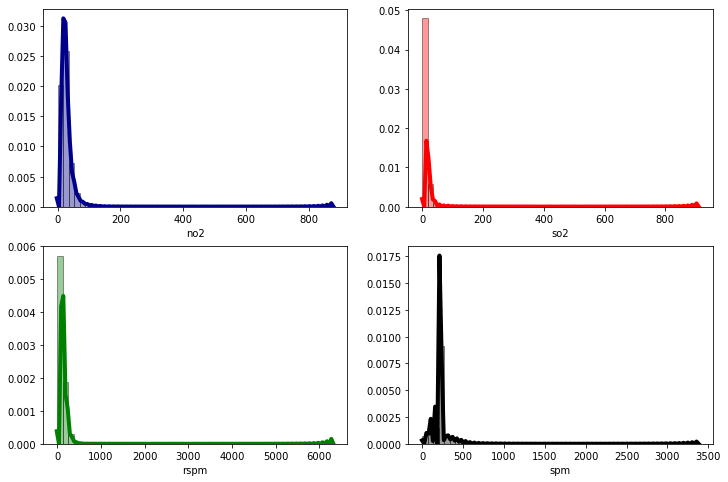

In [46]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))
sns.distplot(df['no2'],hist=True,kde=True,
             color='darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4},
             ax=axarr[0][0])

sns.distplot(df['so2'],hist=True,kde=True,
             color='red',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4},
             ax=axarr[0][1])

sns.distplot(df['rspm'],hist=True,kde=True,
             color='green',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4},
             ax=axarr[1][0])

sns.distplot(df['spm'],hist=True,kde=True,
             color='black',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4},
             ax=axarr[1][1])

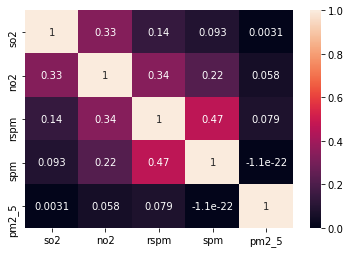

In [47]:
sns.heatmap(
    df.loc[:, ['state','so2', 'no2', 'rspm', 'spm', 'pm2_5']].corr(),
    annot=True
)

Interesting outcome. From the correlations, spm and rspm show a high value, followed by that of rspm and NO2.


#  **Grouping the emmissions by state.**

Let us look at the emmissions by making stateiwse grouping. We have used 'groupby' on the dataset and store it in another DataFrame statewise_emmissions.



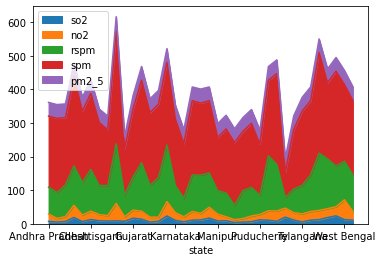

In [48]:
statewise_emmissions = df.groupby('state').mean()[['so2', 'no2', 'rspm', 'spm', 'pm2_5']]
statewise_emmissions.plot.area()



**The highest emmissions are for spm, for each of the states.




    Getting the statistics for highest emmissions, when grouped statewise.



In [49]:
statewise_emmissions.describe()

,so2,no2,rspm,spm,pm2_5
count,37.000000,37.000000,37.000000,37.000000,37.000000
mean,10.834792,23.431668,101.593288,210.929962,40.705551
std,5.125288,10.747456,35.590723,46.301498,0.963178
min,3.695303,8.531134,32.000000,75.000000,35.878344
25%,7.239967,15.891551,79.507951,187.344003,40.791467
50%,10.257348,22.781418,97.130375,215.037496,40.791467
75%,12.517750,26.800000,117.547025,226.072782,40.791467
max,23.724520,58.852111,177.293687,334.814468,43.148310


**Visualising the emmissions according to the type and getting the relevant statistics**

In [50]:

type_emmissions=df.groupby('type').mean()[['so2','no2','rspm','spm','pm2_5']]
type_emmissions.head()

,so2,no2,rspm,spm,pm2_5
type,,,,,
Industrial,23.632492,35.795214,108.832784,300.487057,40.791467
Industrial Area,13.121105,29.088317,119.966564,222.293673,40.881833
Industrial Areas,13.372831,29.737634,121.899020,246.368405,40.791467
RIRUO,10.912577,31.779908,103.617331,220.783480,39.474997
Residential,13.835891,21.331916,108.832784,272.668993,40.791467


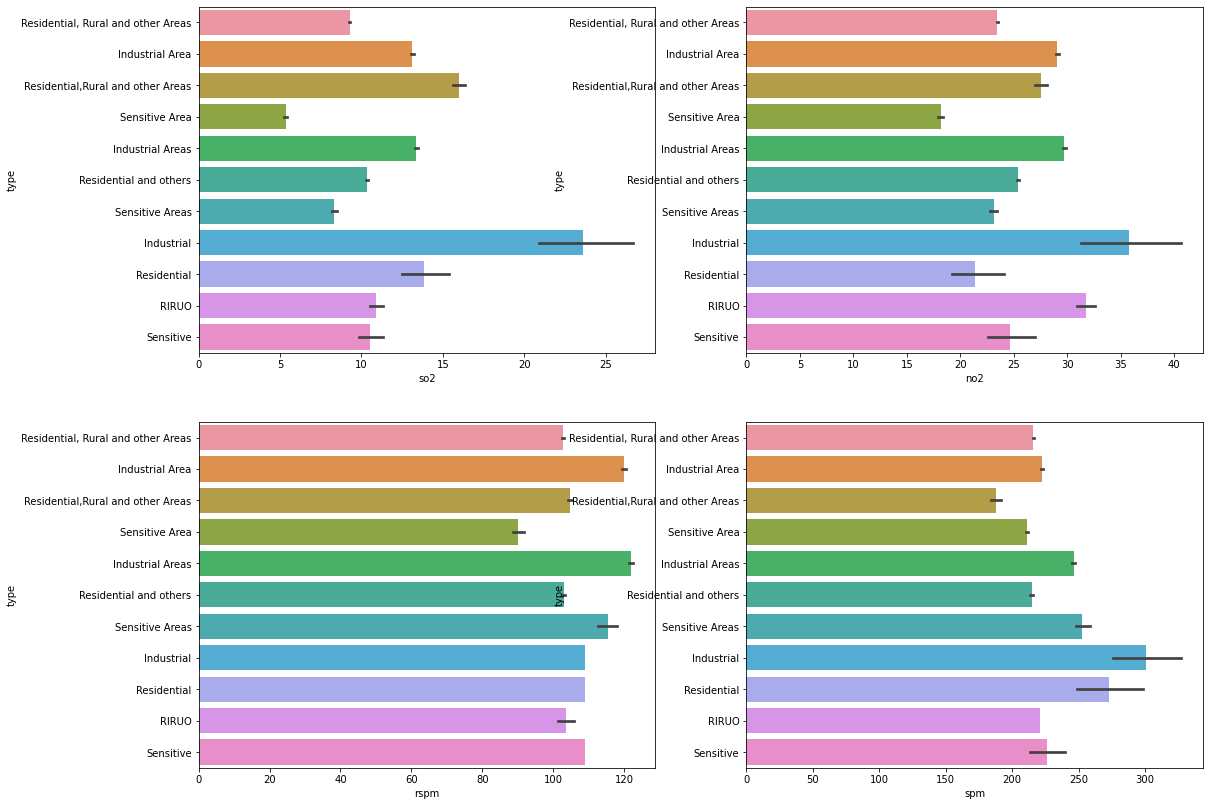

In [51]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(18,14))
ax = sns.barplot("so2", y="type",
                 data=df,
                 ax=axes[0,0]
                )
ax = sns.barplot("no2", y="type",
                 data=df,
                 ax=axes[0,1]
                )
ax = sns.barplot("rspm", y="type",
                 data=df,
                 ax=axes[1,0]
                )
ax = sns.barplot("spm", y="type",
                 data=df,
                 ax=axes[1,1]
                )

Largely it is the Industrial affluents that contribute highest percentage of all the pollutants in India.



#  Understanding the emmissions with time

In [52]:
df['date'].describe()

count         435735
unique          5067
top       2015-03-19
freq             253
Name: date, dtype: object

There are exactly seven missing date values and as we can see there are multiple measurements for the same date.
While dropping the missing dates might seem easiest, we might loose out on some important information.

        Therefore, we will fix this by filling in the missing values by the most frequent values.



In [53]:
df.head()
common_value_date='2015-03-19'
df['date']=df['date'].fillna(common_value_date)
df.tail()



,state,location,type,so2,no2,rspm,spm,pm2_5,date
435737,West Bengal,ULUBERIA,RIRUO,22.000000,50.000000,143.000000,220.78348,40.791467,2015-12-24
435738,West Bengal,ULUBERIA,RIRUO,20.000000,46.000000,171.000000,220.78348,40.791467,2015-12-29
435739,andaman-and-nicobar-islands,NaN,"Residential,Rural and other Areas",10.829414,25.809623,108.832784,220.78348,40.791467,2015-03-19
435740,Lakshadweep,NaN,"Residential,Rural and other Areas",10.829414,25.809623,108.832784,220.78348,40.791467,2015-03-19
435741,Tripura,NaN,"Residential,Rural and other Areas",10.829414,25.809623,108.832784,220.78348,40.791467,2015-03-19




    Visualising the Emmissions over the years, by grouping the dataset datewise and creating a new DataFrame for each of the five listed pollutants.



In [54]:
datewise_emmissions_SO2=df.groupby('date').mean()['so2']
datewise_emmissions_NO2=df.groupby('date').mean()['no2']
datewise_emmissions_rspm=df.groupby('date').mean()['rspm']
datewise_emmissions_spm=df.groupby('date').mean()['spm']



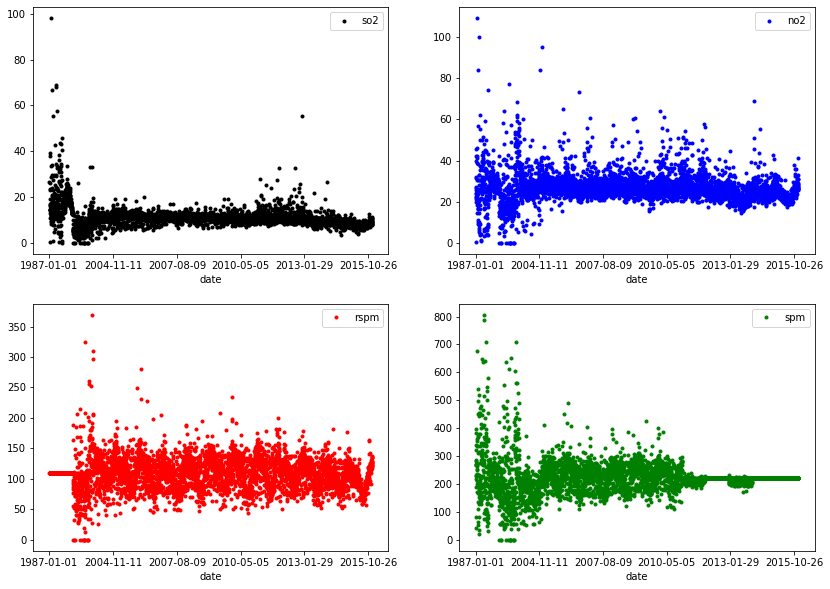

In [55]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(14,10))
datewise_emmissions_SO2.plot(style='k.',legend=True,ax=axes[0,0])
datewise_emmissions_NO2.plot(style='b.',legend=True,ax=axes[0,1])
datewise_emmissions_rspm.plot(style='r.',legend=True,ax=axes[1,0])
datewise_emmissions_spm.plot(style='g.', legend=True,ax=axes[1,1])

So2 emmissions it appears showed a lot of variable readings in the 1990's when the measurements started, but since, the emmissions have been localised within a range and even started showing slight downward trend lately.

NO2 emmissions it appears shows higher variations in the emmissions readings across India.



Let's save and upload our work before continuing.

In [56]:
import jovian

In [57]:
jovian.commit(project = project)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/harshadadesai007/indian-air quality analysis


<IPython.core.display.Javascript object>

## Asking and Answering Questions

We've already gained several insights about the respondents and the programming community in general, simply by exploring individual columns of the dataset. Let's ask some specific questions, and try to answer them using data frame operations and interesting visualizations.

Q1)Find the states which show highest emmissions of NO2.

In [58]:
Top10States_with_highest_No2=statewise_emmissions.sort_values(by='no2',ascending=False).head(10)
Top10States_with_highest_No2_sorted=Top10States_with_highest_No2.loc[:,['no2']]
Top10States_with_highest_No2_sorted.head()

,no2
state,
West Bengal,58.852111
Delhi,51.728223
Jharkhand,42.975080
Bihar,36.173283
Maharashtra,31.988282


West Bengal and Delhi show the highest NO2 emmissions over the years.

Q2)Find the states which show highest emmissions of rspm.

In [59]:
Top10States_with_highest_rspm=statewise_emmissions.sort_values(by='rspm',ascending=False).head(10)
Top10States_with_highest_rspm_sorted=Top10States_with_highest_No2.loc[:,['rspm']]
Top10States_with_highest_rspm_sorted.head()

,rspm
state,
West Bengal,114.717160
Delhi,177.293687
Jharkhand,167.607687
Bihar,117.547025
Maharashtra,102.081778


It can be seen that Delhi and Uttar Pradesh show highest emmission of rspm.

Q3) Which states showed lowest emmission of NO2?

In [60]:
Lowest_emission_NO2=statewise_emmissions.sort_values(by='no2').head()
Lowest_emission_NO2_sorted=Lowest_emission_NO2.loc[:,['no2']]
Lowest_emission_NO2_sorted.head()

,no2
state,
Mizoram,8.531134
Nagaland,10.467137
Arunachal Pradesh,10.893677
Meghalaya,11.843232
Jammu & Kashmir,12.445238


Let's save and commit our work before continuing

Q4) What was the mean emmission of SO2 in 2015?

In [61]:
df['year'] = pd.DatetimeIndex(df['date']).year
df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,108.832784,220.78348,40.791467,1990-02-01,1990
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,108.832784,220.78348,40.791467,1990-02-01,1990
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,108.832784,220.78348,40.791467,1990-02-01,1990
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,108.832784,220.78348,40.791467,1990-03-01,1990
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,108.832784,220.78348,40.791467,1990-03-01,1990


In [62]:
df[df['year']==2015]['so2'].mean()

8.483034394076332

Q5) Which year has the lowest pm2_5 emmision?

In [63]:
df.groupby('year')['pm2_5'].mean().sort_values()

year
2014    40.605412
1991    40.791467
1994    40.791467
1990    40.791467
1993    40.791467
1992    40.791467
1998    40.791467
1995    40.791467
1999    40.791467
1987    40.791467
2000    40.791467
1997    40.791467
1996    40.791467
1988    40.791467
2001    40.791467
1989    40.791467
2002    40.791467
2003    40.791467
2004    40.791467
2005    40.791467
2009    40.791467
2006    40.791467
2008    40.791467
2007    40.791467
2010    40.791467
2012    40.791467
2011    40.791467
2013    40.791467
2015    40.954929
Name: pm2_5, dtype: float64

As we can see, 2014 is the year with minimum emission of pm2_5

In [66]:
import jovian

In [ ]:
jovian.commit(project=project)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/harshadadesai007/indian-air quality analysis


<IPython.core.display.Javascript object>